<a href="https://colab.research.google.com/github/LucasVale98/Formacao_Data_Science/blob/main/Regress%C3%A3o_Linear_T%C3%A9cnicas_Avan%C3%A7adas_de_Modelagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/datasets/alura_curssos/Regressão Linear: Técnicas Avançadas de Modelagem'

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv(path + '/dataset.csv', sep=";")

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>

In [ ]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


In [ ]:
dados.shape

(5000, 4)

# **01. Analises Preliminares**

**Análises preliminares**

In [ ]:
dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


In [ ]:
dados.corr().round(4)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.0000,0.7110,-0.3665,-0.0244
Area,0.7110,1.0000,-0.2834,-0.0310
Dist_Praia,-0.3665,-0.2834,1.0000,0.0256
Dist_Farmacia,-0.0244,-0.0310,0.0256,1.0000


**02. Análises Gáficas**

In [ ]:
import seaborn as sns

In [ ]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG_r, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, Pubu, Pubu_r, PubuGn, PubuGn_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r,RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistis_r, YlGn, YlGn_r, YlGnBu, YlGnBu_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmohot, afmohot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot_r, gnuplot2, gnuplot2_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

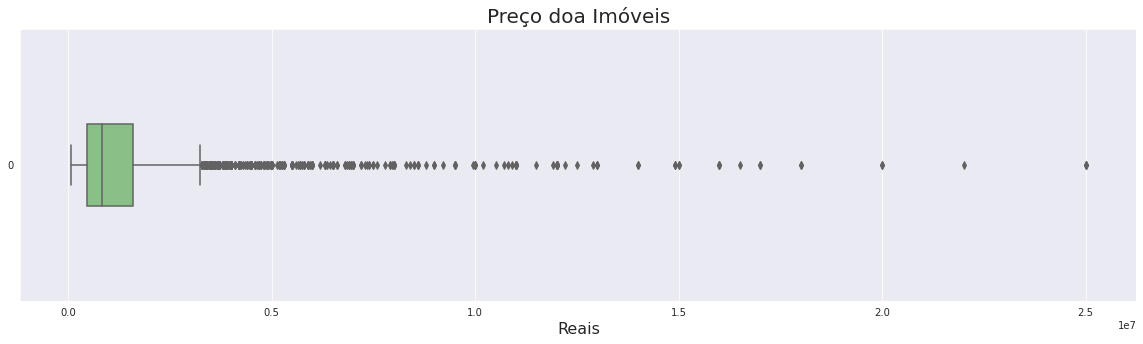

In [ ]:
ax = sns.boxplot(data=dados["Valor"], orient="h", width=0.3)

ax.figure.set_size_inches(20, 5)
ax.set_title('Preço doa Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

**Distribuição de frequências**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


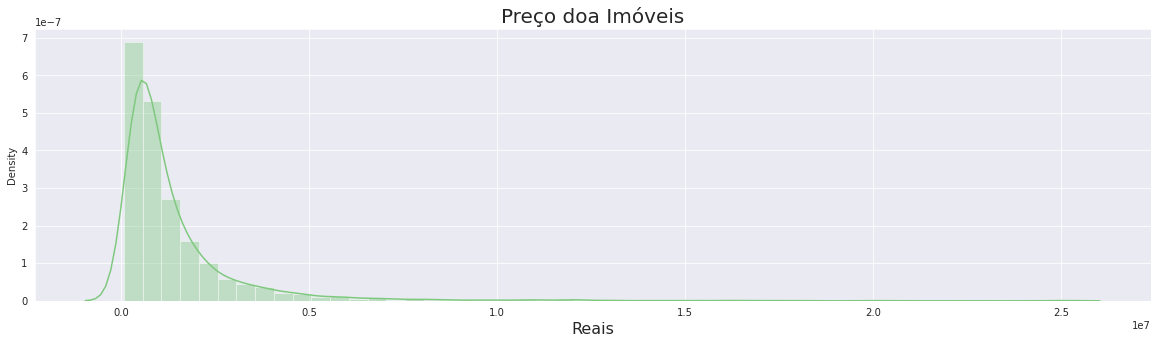

In [ ]:
ax = sns.distplot(dados["Valor"])

ax.figure.set_size_inches(20, 5)
ax.set_title('Preço doa Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

**Dispersão entre as variáveis**

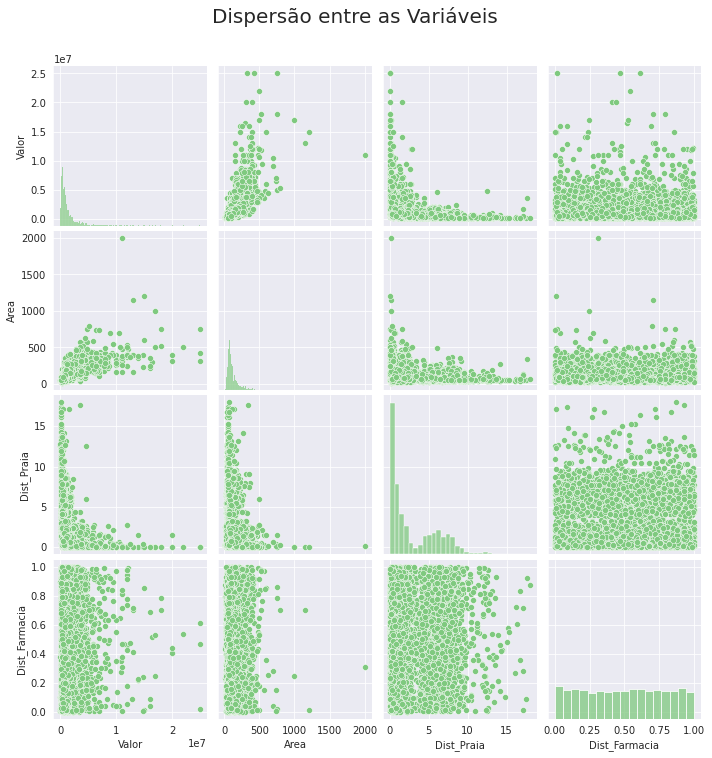

In [ ]:
ax = sns.pairplot(dados)

ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

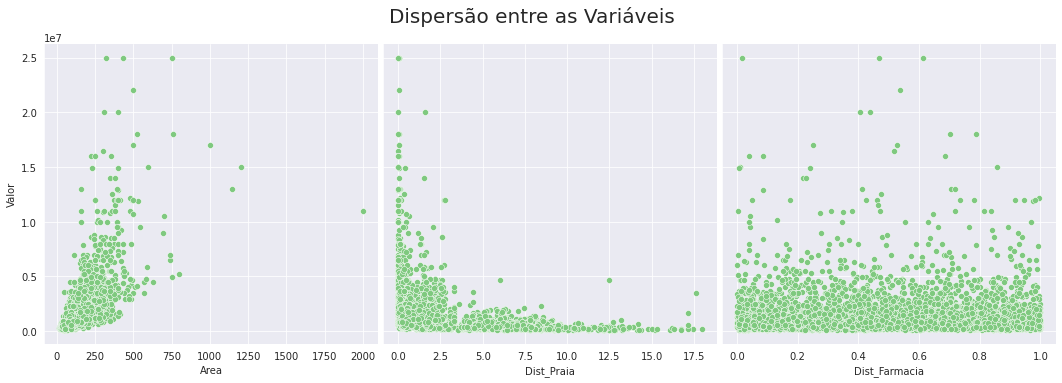

In [ ]:
ax = sns.pairplot(dados, y_vars="Valor", x_vars=["Area", "Dist_Praia", "Dist_Farmacia"], height=5)
 
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

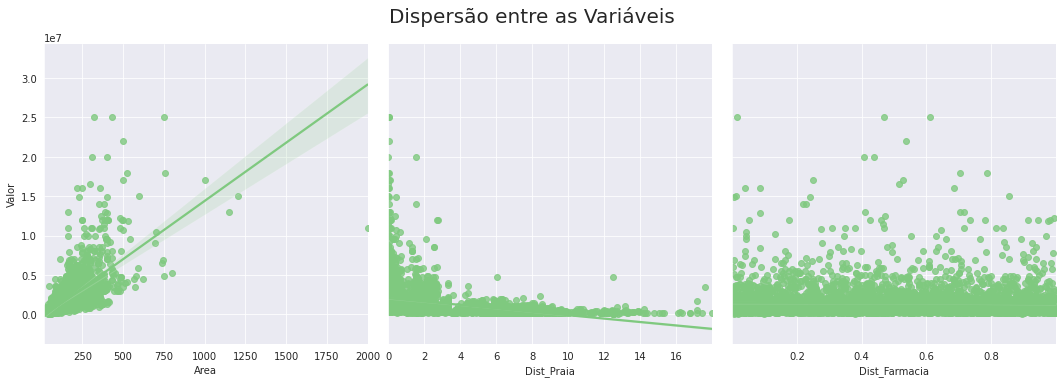

In [ ]:
ax = sns.pairplot(dados, y_vars='Valor', x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], kind='reg', height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# **03. Tratamento de Variáveis**

**Transformando os dados**

In [ ]:
import numpy as np

In [ ]:
np.log(0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

In [ ]:
np.log(1)

0.0

In [ ]:
dados['log_Valor'] = np.log(dados['Valor'])
dados['log_Area'] = np.log(dados['Area'])
dados['log_Dist_Praia'] = np.log(dados['Dist_Praia'] + 1)
dados['log_Dist_Farmacia'] = np.log(dados['Dist_Farmacia'] + 1)

In [ ]:
dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


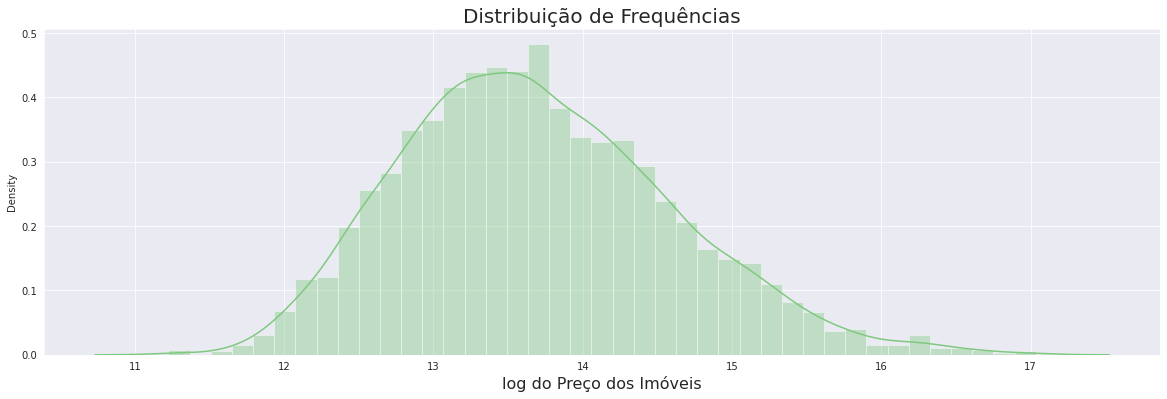

In [ ]:
ax = sns.distplot(dados['log_Valor'])

ax.figure.set_size_inches(20,6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

**Verificando a relação linear**

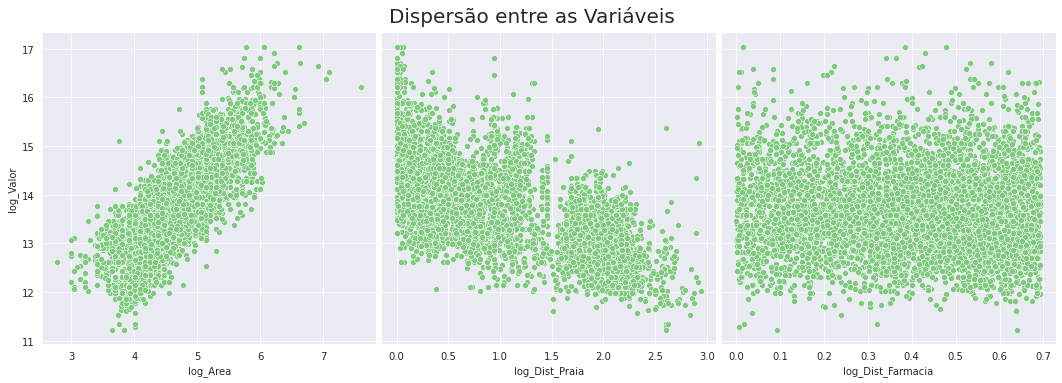

In [ ]:
ax = sns.pairplot(dados, y_vars="log_Valor", x_vars=["log_Area", "log_Dist_Praia", "log_Dist_Farmacia"], height=5)
 
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# **04. Regressão Linear com StatsModels**

**Criando os datasets de treino e teste**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = dados['log_Valor']

In [ ]:
X = dados[['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia']]

In [ ]:
train_test_split(X, y, test_size=0.2, random_state=2811)

[      log_Area  log_Dist_Praia  log_Dist_Farmacia
 2661  5.945421        0.000000           0.382273
 912   3.135494        0.972865           0.605015
 3042  4.317488        1.794961           0.486594
 141   3.401197        0.310455           0.599609
 3854  5.676754        0.032193           0.101903
 ...        ...             ...                ...
 3657  5.075174        2.023480           0.333605
 979   4.174387        2.296141           0.156465
 2389  4.394449        1.367741           0.409727
 447   3.951244        2.166841           0.217381
 2008  4.406719        1.692269           0.537831
 
 [4000 rows x 3 columns],       log_Area  log_Dist_Praia  log_Dist_Farmacia
 1006  5.273000        1.282769           0.546323
 3115  4.007333        1.930021           0.684319
 4394  4.442651        1.684541           0.495648
 3877  4.219508        0.357133           0.475526
 1175  4.465908        1.696499           0.680696
 ...        ...             ...                ...
 180

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [ ]:
X_train

,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,5.945421,0.000000,0.382273
912,3.135494,0.972865,0.605015
3042,4.317488,1.794961,0.486594
141,3.401197,0.310455,0.599609
3854,5.676754,0.032193,0.101903
...,...,...,...
3657,5.075174,2.023480,0.333605
979,4.174387,2.296141,0.156465
2389,4.394449,1.367741,0.409727
447,3.951244,2.166841,0.217381


**Trabalhando com StatsModels**

In [ ]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
X_train_com_constante

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst=True).fit

**Modificando o modelo e avaliando o ajuste**

In [ ]:
X = dados[['log_Area', 'log_Dist_Praia']]

In [ ]:
X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

In [ ]:
X_train_com_constante = sm.add_constant(X_train)

In [ ]:
modelo_statsmodels = sm.OLS(y_train, X_train_com_constante, hasconst = True).fit()

In [ ]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Wed, 17 Feb 2021   Prob (F-statistic):               0.00
Time:                        21:59:55   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

**05. Regressão Linear Com Sckit Learn**

**Estimando o modelo com os dados de treino**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

In [ ]:
modelo =  LinearRegression() 

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(3)))

R² = 0.805


In [ ]:
y_previsto = modelo.predict(X_teste)

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(3))

R² = 0.79


**Obtendo previsões pontuais**

In [ ]:
entrada = X_teste[0:1]

In [ ]:
modelo.predict(entrada)[0]

14.28482006184788

In [ ]:
np.exp(modelo.predict(entrada)[0]) 

1598889.784779439

In [ ]:
Area = 250
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]

print('R$ {0: 2f}'.format(np.exp(modelo.predict(entrada)[0])))

R$  2777292.840312


**Interpretação dos coeficientes estimados**

In [ ]:
modelo.intercept_

9.334916409800329

In [ ]:
np.exp(modelo.intercept_)

11326.681428069842

In [ ]:
modelo.coef_

array([ 1.05807818, -0.49061226])

In [ ]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

In [ ]:
index = ['Intercepto','log Área', 'log Distância até a Praia']

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,9.334916
log Área,1.058078
log Distância até a Praia,-0.490612


**Análises gráficas dos resultados do modelo**

In [ ]:
y_previsto_train = modelo.predict(X_train)

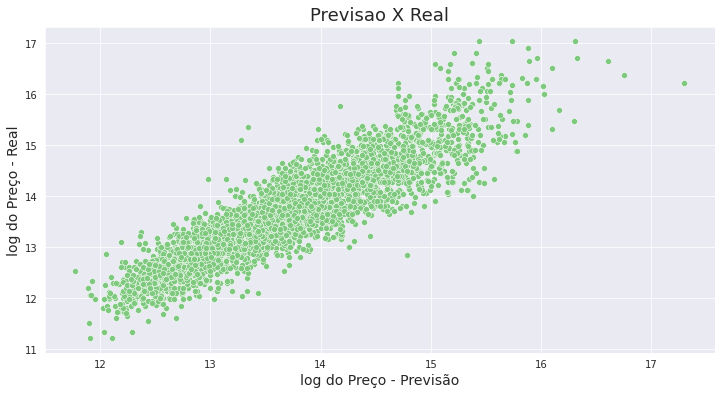

In [ ]:
ax = sns.scatterplot(x=y_previsto_train, y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsao X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

In [ ]:
residuo = y_train - y_previsto_train

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


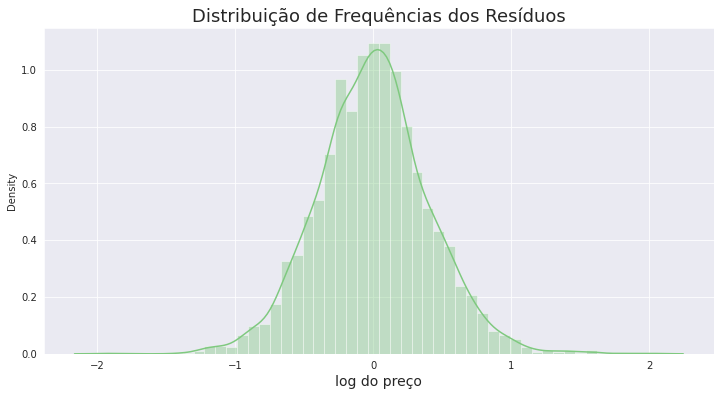

In [ ]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do preço', fontsize=14)
ax